In [1]:
# 安装中文字体包
!apt-get -y install fonts-wqy-zenhei

# 清除 matplotlib 缓存
import matplotlib.pyplot as plt
import matplotlib as mpl
!rm -rf ~/.cache/matplotlib

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-zenhei is already the newest version (0.9.45-8).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


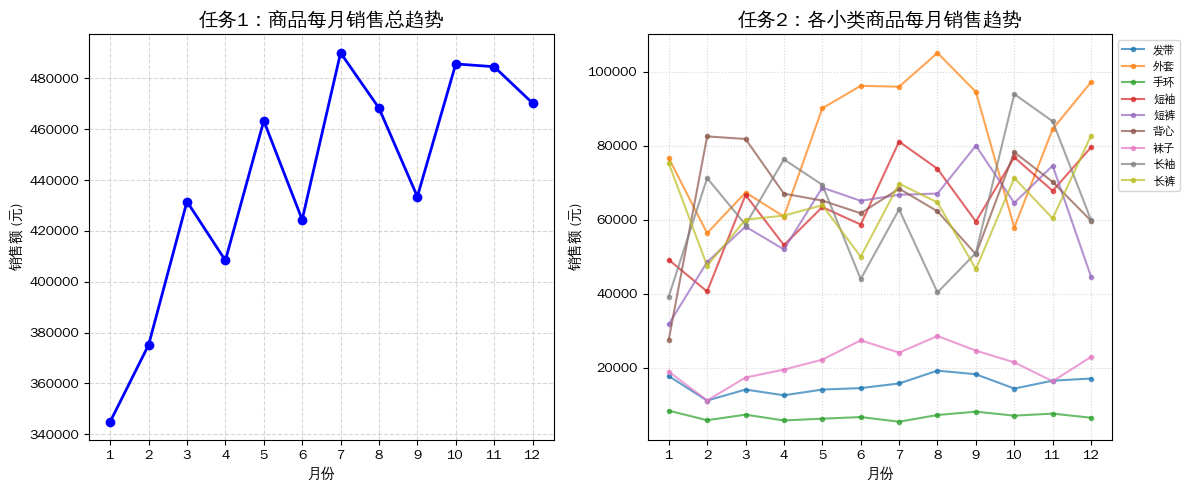

每月销售概况：
月份          1         2         3         4         5         6         7   \
销售金额  344878.0  375111.0  431575.0  408359.0  463358.0  424416.0  490090.0   

月份          8         9         10        11        12  
销售金额  468356.0  433489.0  485727.0  484643.0  470306.0  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取并合并数据
df_info = pd.read_excel('商品销售数据.xlsx', sheet_name='信息表')
df_sales = pd.read_excel('商品销售数据.xlsx', sheet_name='销售数据表')
df_merged = pd.merge(df_info, df_sales, on='商品编号', how='right')

# 计算销售额和提取月份
df_merged['销售金额'] = df_merged['商品销售价'] * df_merged['订单数量']
df_merged['订单日期'] = pd.to_datetime(df_merged['订单日期'])
df_merged['月份'] = df_merged['订单日期'].dt.month

# 分析商品每月销售变化趋势
monthly_sales = df_merged.groupby('月份')['销售金额'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(monthly_sales['月份'], monthly_sales['销售金额'], marker='o', color='b', linewidth=2)
plt.title('商品每月销售总趋势', fontsize=14)
plt.xlabel('月份')
plt.ylabel('销售额 (元)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)

# 分析小类商品每月销售变化趋势
# 使用透视表统计各小类每月的销售情况
sub_cat_trend = df_merged.pivot_table(index='月份', columns='商品小类', values='销售金额', aggfunc='sum').fillna(0)

plt.subplot(1, 2, 2)
for column in sub_cat_trend.columns:
    plt.plot(sub_cat_trend.index, sub_cat_trend[column], label=column, marker='.', alpha=0.7)

plt.title('各小类商品每月销售趋势', fontsize=14)
plt.xlabel('月份')
plt.ylabel('销售额 (元)')
plt.xticks(range(1, 13))
plt.legend(prop={'size': 8}, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# 输出统计数值供参考
print("每月销售概况：")
print(monthly_sales.set_index('月份').T)